In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving investments_VC_full.csv to investments_VC_full.csv


In [ ]:
ds=pd.read_csv("investments_VC_full.csv",encoding='unicode_escape')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49438 entries, 0 to 49437
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  int64  
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [ ]:
ds.dropna(how='all',inplace=True)

In [ ]:
ds.drop(['permalink','name','homepage_url','category_list','state_code','region','city','founded_at','founded_month','founded_quarter','founded_year','first_funding_at','last_funding_at'],axis=1,inplace=True)

In [ ]:
ds.rename(columns={' market ':'market',' funding_total_usd ':'funding_total_usd'},inplace=True)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49438 entries, 0 to 49437
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   market                45470 non-null  object
 1   funding_total_usd     49438 non-null  object
 2   status                48124 non-null  object
 3   country_code          44165 non-null  object
 4   funding_rounds        49438 non-null  int64 
 5   seed                  49438 non-null  int64 
 6   venture               49438 non-null  int64 
 7   equity_crowdfunding   49438 non-null  int64 
 8   undisclosed           49438 non-null  int64 
 9   convertible_note      49438 non-null  int64 
 10  debt_financing        49438 non-null  int64 
 11  angel                 49438 non-null  int64 
 12  grant                 49438 non-null  int64 
 13  private_equity        49438 non-null  int64 
 14  post_ipo_equity       49438 non-null  int64 
 15  post_ipo_debt         49438 non-null

In [ ]:
market=ds.market.value_counts()
print(market)

 Software           4620
 Biotechnology      3688
 Mobile             1983
 E-Commerce         1805
 Curated Web        1655
                    ... 
 Enterprise 2.0        1
 Lotteries             1
 Retirement            1
 Music Venues          1
 Sex                   1
Name: market, Length: 753, dtype: int64


In [ ]:
market[(market>1000)]#[0:10]

 Software                4620
 Biotechnology           3688
 Mobile                  1983
 E-Commerce              1805
 Curated Web             1655
 Enterprise Software     1280
 Health Care             1207
 Clean Technology        1200
 Games                   1182
 Hardware + Software     1081
 Advertising             1064
Name: market, dtype: int64

In [ ]:
market=market[(market>1000)][0:10].to_frame()

In [ ]:
print(market)

                       market
 Software                4620
 Biotechnology           3688
 Mobile                  1983
 E-Commerce              1805
 Curated Web             1655
 Enterprise Software     1280
 Health Care             1207
 Clean Technology        1200
 Games                   1182
 Hardware + Software     1081


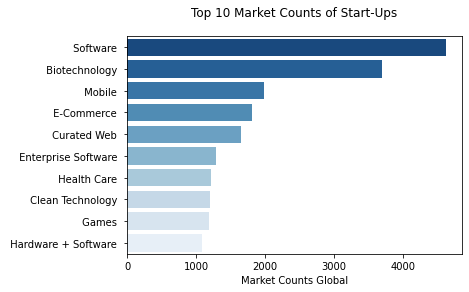

In [ ]:
plt.figure()
ax1=sns.barplot(y=market.index,x=market.market,orient='h',palette='Blues_r')
ax1.set_title('Top 10 Market Counts of Start-Ups',pad=20)
ax1.set_xlabel('Market Counts Global')
plt.show()

In [ ]:
ds['funding_total_usd']=ds['funding_total_usd'].fillna(value=0)
ds['status']=ds['status'].fillna(value='closed')
ds['market']=ds['market'].fillna(value='unsure')
ds['country_code']=ds['country_code'].fillna(value='NA')

In [ ]:
x=ds.iloc[:,:]
y=ds.iloc[:,2]
x.drop(['status'],axis=1,inplace=True)

In [ ]:
x.head()

,market,funding_total_usd,country_code,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,News,"17,50,000",USA,1,1750000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Games,"40,00,000",USA,2,0,4000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Publishing,"40,000",EST,1,40000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Electronics,"15,00,000",GBR,1,1500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Tourism,"60,000",USA,2,0,0,60000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
mar=pd.get_dummies(x['market'],drop_first=True)
print(mar)

        3D Printing    3D Technology   ...   mHealth   unsure
0                  0                0  ...          0       0
1                  0                0  ...          0       0
2                  0                0  ...          0       0
3                  0                0  ...          0       0
4                  0                0  ...          0       0
...              ...              ...  ...        ...     ...
49433              0                0  ...          0       0
49434              0                0  ...          0       0
49435              0                0  ...          0       0
49436              0                0  ...          0       0
49437              0                0  ...          0       0

[49438 rows x 753 columns]


In [ ]:
cc=pd.get_dummies(x['country_code'],drop_first=True)
print(cc)

       ARE  ARG  ARM  AUS  AUT  AZE  BEL  ...  UKR  URY  USA  UZB  VNM  ZAF  ZWE
0        0    0    0    0    0    0    0  ...    0    0    1    0    0    0    0
1        0    0    0    0    0    0    0  ...    0    0    1    0    0    0    0
2        0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
3        0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
4        0    0    0    0    0    0    0  ...    0    0    1    0    0    0    0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
49433    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
49434    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
49435    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
49436    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
49437    0    0    0    0    0    0    0  ...    0    0    1    0    0    0    0

[49438 rows x 115 columns]


In [ ]:
x.drop(['market','country_code'],axis=1,inplace=True)
x.head()

,funding_total_usd,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,"17,50,000",1,1750000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"40,00,000",2,0,4000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"40,000",1,40000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"15,00,000",1,1500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"60,000",2,0,0,60000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=pd.concat([x,mar,cc],axis=1)
x.info()
x.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49438 entries, 0 to 49437
Columns: 2627 entries, funding_total_usd to ZWE
dtypes: int64(22), object(1), uint8(2604)
memory usage: 131.8+ MB


,funding_total_usd,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,3D Printing,3D Technology,Accounting,Ad Targeting,Advanced Materials,Adventure Travel,Advertising,Advertising Exchanges,Advertising Networks,Advertising Platforms,Advice,Aerospace,Agriculture,Algorithms,All Markets,All Students,Alternative Medicine,...,MYS,NA,NGA,NIC,NLD,NOR,NPL,NZL,OMN,PAK,PAN,PER,PHL,POL,PRT,ROM,RUS,SAU,SGP,SLV,SOM,SRB,SVK,SVN,SWE,SYC,THA,TTO,TUN,TUR,TWN,TZA,UGA,UKR,URY,USA,UZB,VNM,ZAF,ZWE
0,"17,50,000",1,1750000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,"40,00,000",2,0,4000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,"40,000",1,40000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"15,00,000",1,1500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"60,000",2,0,0,60000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
x.funding_total_usd=x.funding_total_usd.str.replace(',','')
x.head()

,funding_total_usd,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,3D Printing,3D Technology,Accounting,Ad Targeting,Advanced Materials,Adventure Travel,Advertising,Advertising Exchanges,Advertising Networks,Advertising Platforms,Advice,Aerospace,Agriculture,Algorithms,All Markets,All Students,Alternative Medicine,...,MYS,NA,NGA,NIC,NLD,NOR,NPL,NZL,OMN,PAK,PAN,PER,PHL,POL,PRT,ROM,RUS,SAU,SGP,SLV,SOM,SRB,SVK,SVN,SWE,SYC,THA,TTO,TUN,TUR,TWN,TZA,UGA,UKR,URY,USA,UZB,VNM,ZAF,ZWE
0,1750000,1,1750000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,4000000,2,0,4000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,40000,1,40000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1500000,1,1500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60000,2,0,0,60000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
#x.funding_total_usd=x.funding_total_usd.replace("-",np.nan).astype('float',errors='ignore')
#x.dtypes
#for i in range(2627):
 #   x.funding_total_usd[i]=float(x.funding_total_usd[i])
x['funding_total_usd'] =pd.to_numeric(x['funding_total_usd'],downcast='float',errors='coerce')
x['funding_total_usd'] = np.float64(x['funding_total_usd'])
x.dtypes

funding_total_usd      float64
funding_rounds           int64
seed                     int64
venture                  int64
equity_crowdfunding      int64
                        ...   
USA                      uint8
UZB                      uint8
VNM                      uint8
ZAF                      uint8
ZWE                      uint8
Length: 2627, dtype: object

In [ ]:
x['funding_total_usd']=x['funding_total_usd'].fillna(value=0)
x.isnull().sum()

funding_total_usd      0
funding_rounds         0
seed                   0
venture                0
equity_crowdfunding    0
                      ..
USA                    0
UZB                    0
VNM                    0
ZAF                    0
ZWE                    0
Length: 2627, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.5,random_state=1)
rf=RandomForestClassifier(criterion='entropy',n_estimators=50,random_state=0,n_jobs=2)

In [ ]:
rf.fit(xtr,ytr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
ypr=rf.predict(xte)
print("Random forest accuracy: ",100*accuracy_score(yte,ypr))

Random forest accuracy:  81.77110724543873
